In [7]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(50, 0.125)

In [8]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Rainbow',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [9]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [10]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Node Connections<br>',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("book.csv")
# pick only important weights (hard threshold)
df = df.loc[df['weight']>10, :]
df

,Source,Target,Type,weight,book
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1
16,Aerys-II-Targaryen,Robert-Baratheon,Undirected,12,1
17,Aggo,Daenerys-Targaryen,Undirected,11,1
30,Alliser-Thorne,Jon-Snow,Undirected,32,1
...,...,...,...,...,...
658,Sandor-Clegane,Sansa-Stark,Undirected,23,1
664,Shae,Tyrion-Lannister,Undirected,12,1
666,Shagga,Tyrion-Lannister,Undirected,17,1
676,Tyrion-Lannister,Tywin-Lannister,Undirected,40,1


In [13]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 
                            source='Source', 
                            target='Target', 
                            edge_attr='weight')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))


No of unique characters: 80
No of connections: 175


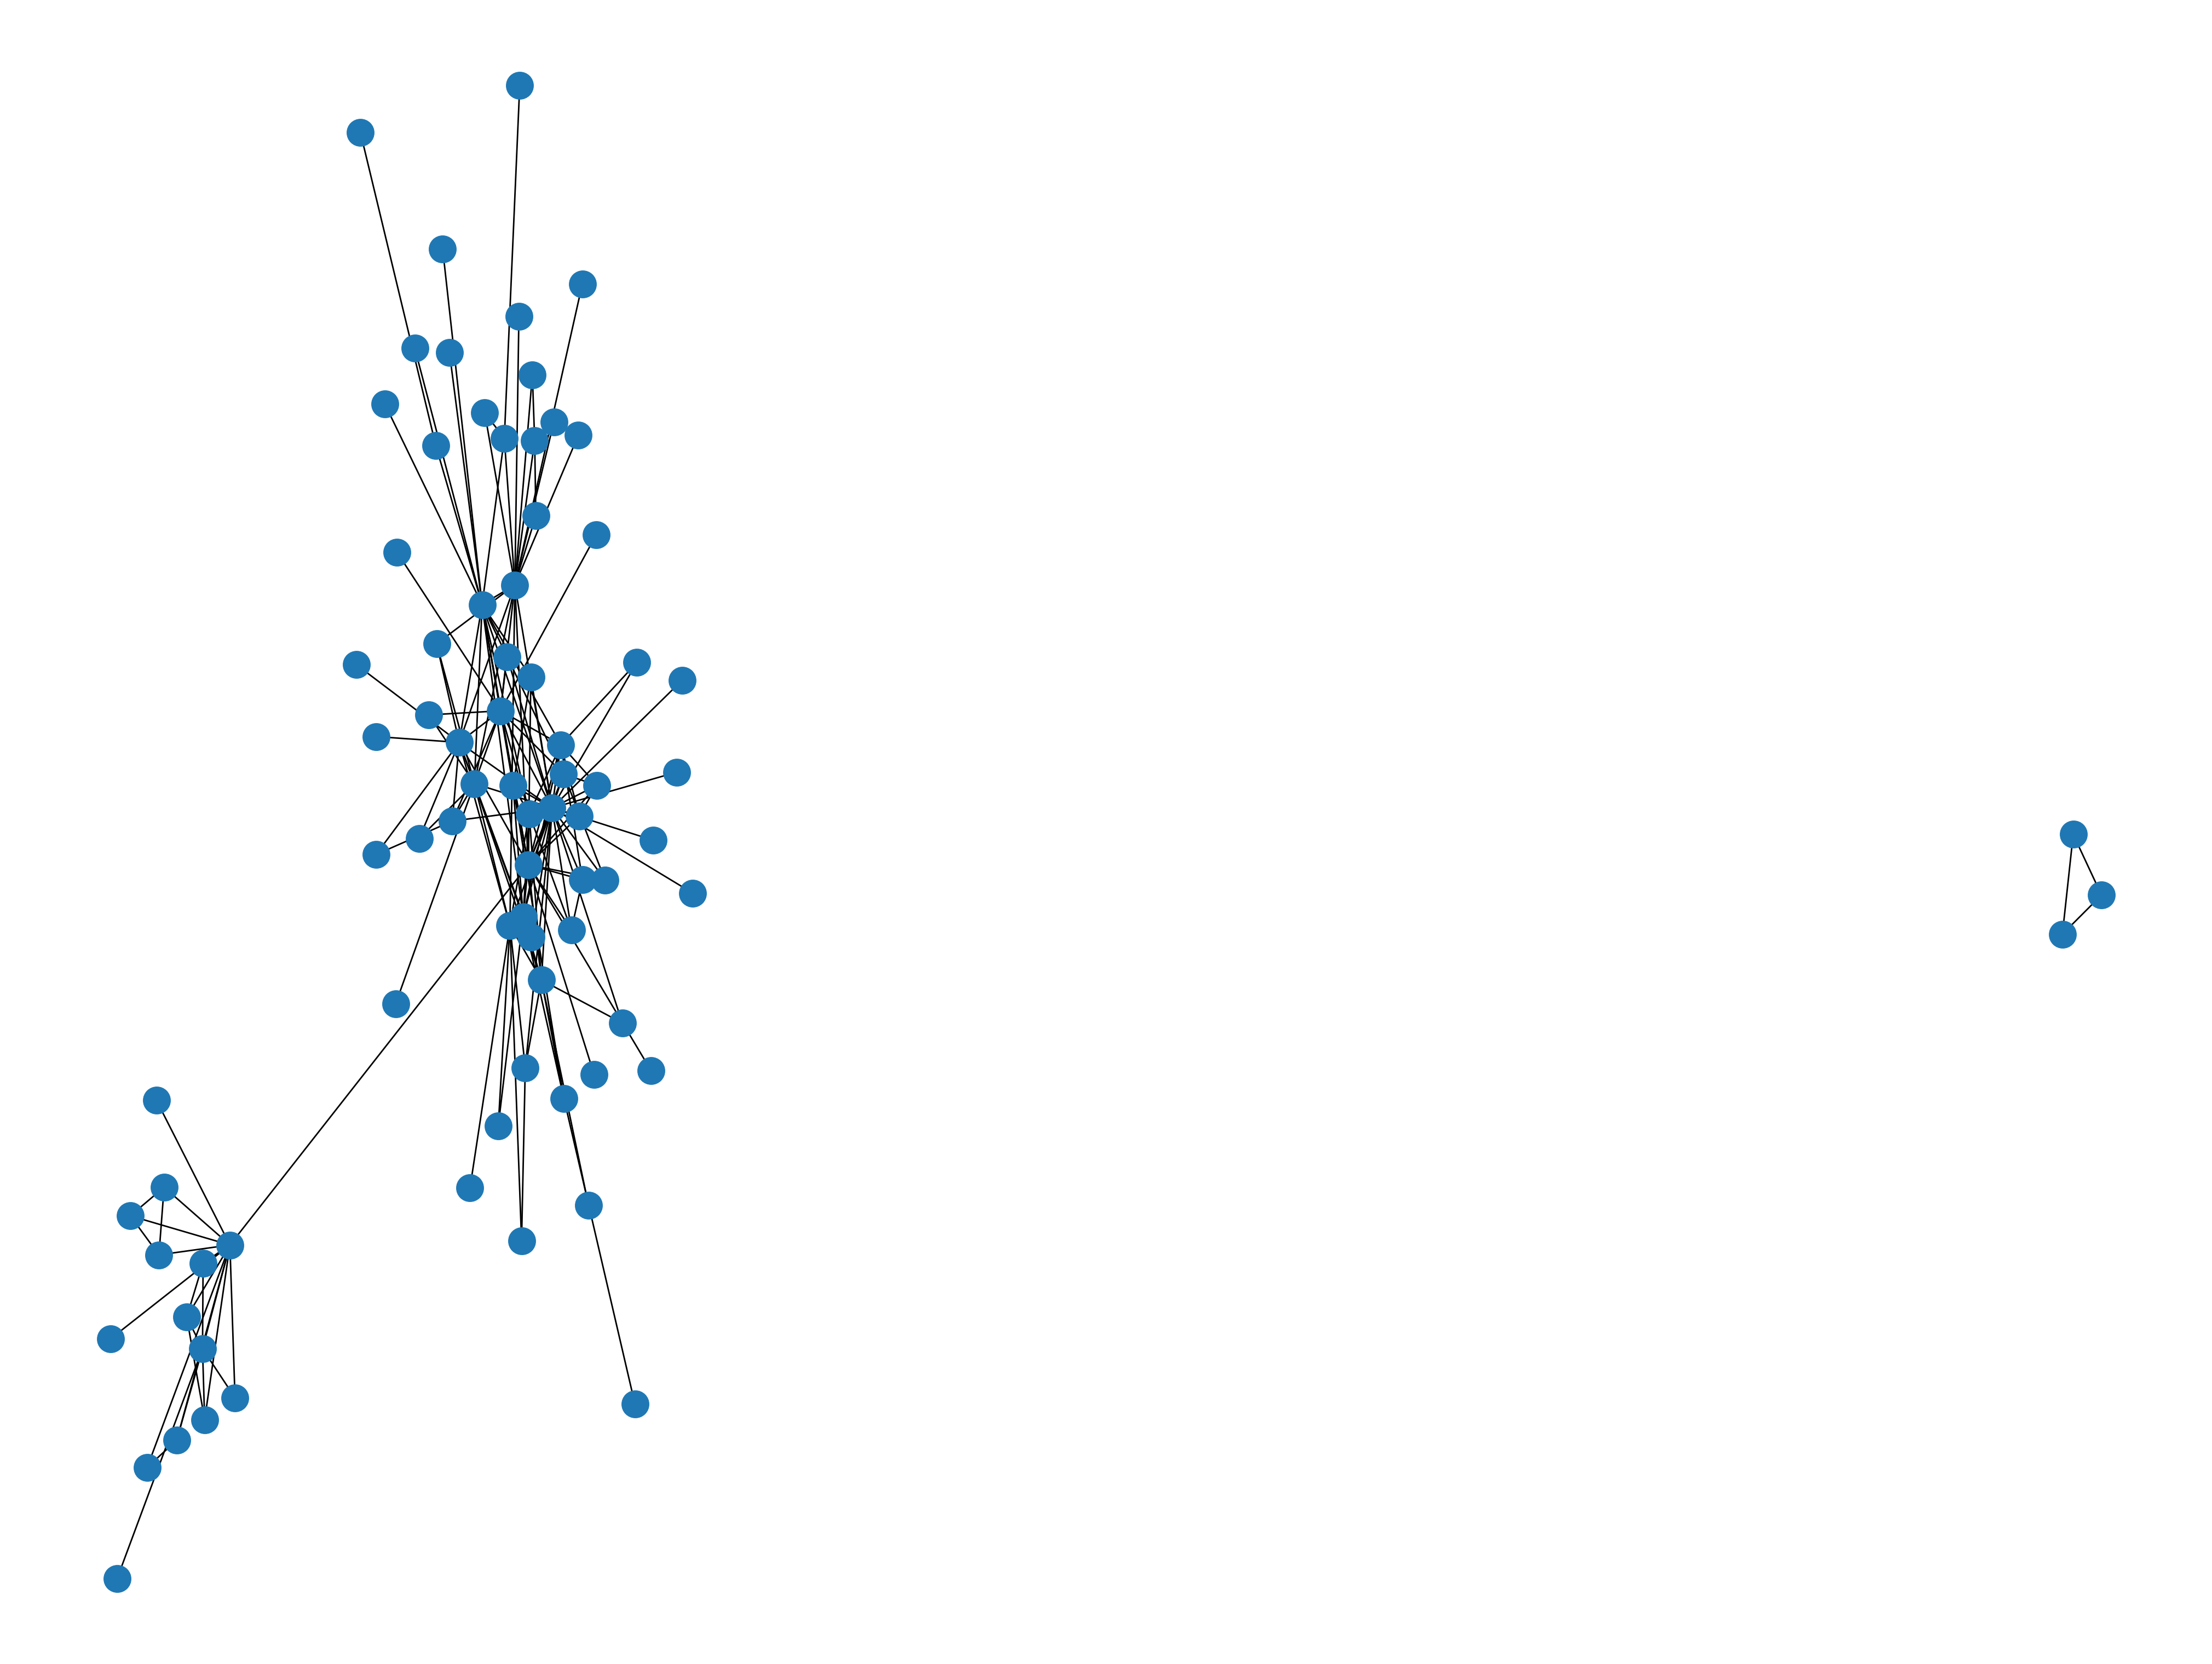

In [16]:
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

selected_graph_option = 0

plt.figure(figsize=(20,15), dpi=200) 
graphs_viz_options[selected_graph_option](G)